# Density matrix exponentiation
## Overview
This is a function to simulate DME. It follows the protocol laid down by https://arxiv.org/abs/2001.08838

Goals: implement the unitary $U=e^{-i\rho\theta}$ on data qubit $\sigma$ (rotate $\sigma$ by $\theta$) according to instruction given by instruction qubit $\rho$.

DME uses the relation (rotate $\sigma$ by small angle $\delta = \sigma/N$).
$$\begin{align}
Tr_\rho [e^{-iSWAP\delta}\sigma\otimes\rho e^{iSWAP\delta}] &= \sigma - i\delta[\rho,\sigma] +\mathcal{O}(\delta^2)\\
&= e^{-i\rho\delta}\sigma e^{i\rho\delta}+\mathcal{O}(\delta^2)
\end{align}$$

Reference
- Kjaergaard, M., Schwartz, M. E., Greene, A., Samach, G. O., Bengtsson, A., O'Keeffe, M., ... Oliver, W. D. (2020). 
    Programming a quantum computer with quantum instructions. arXiv preprint arXiv:2001.08838. 
    Retrieved from https://arxiv.org/abs/2001.08838 


## Code exlanation
In this code, we set $\theta = \pi, N =k$ with 1 work qubit and $k$ instruction qubits (it is possible to set more instruction qubits here, but they will just be idle). 

The instruction qubits are thrown out after usage (We call it Sequential Instruction Qubit protocol). Each query use, accordingly, k qubits. Each call use 1 query.

Our goal is to rotate qubit 0 from state $\ket{0}$ to state $\ket{1}$ by using an $RX(\pi)$ pulse. We demonstrate this by showing the number of counter that return 1.

In [1]:
from qibo.models.qdp.memory_usage_query import DensityMatrixExponentiation
from qibo.quantum_info.metrics import fidelity
import numpy as np
from qibo import gates
theta = np.pi

### $\rho = \ket +,\sigma = \ket 0$. Expect $\sigma_f = \ket +$

In [2]:
class DME_test(DensityMatrixExponentiation):
    def instruction_qubits_initialization(self):
        """Initializes the instruction qubits."""
        for instruction_qubit in self.list_id_current_instruction_reg:
            self.c.add(gates.RX(instruction_qubit,np.pi/2))

In [3]:
k = 10
my_protocol = DME_test(theta=np.pi/2,N=k,num_work_qubits=1,num_instruction_qubits=k,number_muq_per_call=1)
#my_protocol.c.add(gates.X(0))
my_protocol.memory_call_circuit(num_instruction_qubits_per_query=k)
qubit_0 = my_protocol.c.execute(nshots=1000).probabilities([0])
qubit_0 = np.round(np.sqrt(qubit_0),3)
print(f'Final state = {qubit_0[0]}*|0> + {qubit_0[1]}*|1>')

[Qibo 0.2.9|INFO|2024-07-01 11:56:30]: Using qibojit (numba) backend on /CPU:0


Final state = 0.707*|0> + 0.707*|1>


In [4]:
state_dme = np.array([qubit_0[0],qubit_0[1]])
ket_plus = np.array([[1/np.sqrt(2),1/np.sqrt(2)]])
print(f'Fidelity: {np.inner(ket_plus,state_dme)[0]**2}')

Fidelity: 0.9996979999999996


In [5]:
k = 5
ket_plus = np.array([[1/np.sqrt(2),1/np.sqrt(2)]])
res_5 = []
thetas = np.linspace(0,3*np.pi,50)

for theta in thetas:
    my_protocol = DME_test(theta=theta,N=k,num_work_qubits=1,num_instruction_qubits=k,number_muq_per_call=1)
    #my_protocol.c.add(gates.X(0))
    my_protocol.memory_call_circuit(num_instruction_qubits_per_query=k)
    qubit_0 = my_protocol.c.execute(nshots=1000).probabilities([0])
    qubit_0 = np.round(np.sqrt(qubit_0),3)
    state_dme = np.array([qubit_0[0],qubit_0[1]])

    res_5.append(np.inner(ket_plus,state_dme)[0])

In [6]:
k = 10
ket_plus = np.array([[1/np.sqrt(2),1/np.sqrt(2)]])
res_10 = []
thetas = np.linspace(0,3*np.pi,50)

for theta in thetas:
    my_protocol = DME_test(theta=theta,N=k,num_work_qubits=1,num_instruction_qubits=k,number_muq_per_call=1)
    #my_protocol.c.add(gates.X(0))
    my_protocol.memory_call_circuit(num_instruction_qubits_per_query=k)
    qubit_0 = my_protocol.c.execute(nshots=1000).probabilities([0])
    qubit_0 = np.round(np.sqrt(qubit_0),3)
    state_dme = np.array([qubit_0[0],qubit_0[1]])

    res_10.append(np.inner(ket_plus,state_dme)[0])

In [7]:
k = 15
ket_plus = np.array([[1/np.sqrt(2),1/np.sqrt(2)]])
res_15 = []
thetas = np.linspace(0,3*np.pi,50)

for theta in thetas:
    my_protocol = DME_test(theta=theta,N=k,num_work_qubits=1,num_instruction_qubits=k,number_muq_per_call=1)
    #my_protocol.c.add(gates.X(0))
    my_protocol.memory_call_circuit(num_instruction_qubits_per_query=k)
    qubit_0 = my_protocol.c.execute(nshots=1000).probabilities([0])
    qubit_0 = np.round(np.sqrt(qubit_0),3)
    state_dme = np.array([qubit_0[0],qubit_0[1]])

    res_15.append(np.inner(ket_plus,state_dme)[0])

In [8]:
k = 20
ket_plus = np.array([[1/np.sqrt(2),1/np.sqrt(2)]])
res_20 = []
thetas = np.linspace(0,3*np.pi,50)

for theta in thetas:
    my_protocol = DME_test(theta=theta,N=k,num_work_qubits=1,num_instruction_qubits=k,number_muq_per_call=1)
    #my_protocol.c.add(gates.X(0))
    my_protocol.memory_call_circuit(num_instruction_qubits_per_query=k)
    qubit_0 = my_protocol.c.execute(nshots=1000).probabilities([0])
    qubit_0 = np.round(np.sqrt(qubit_0),3)
    state_dme = np.array([qubit_0[0],qubit_0[1]])

    res_20.append(np.inner(ket_plus,state_dme)[0])

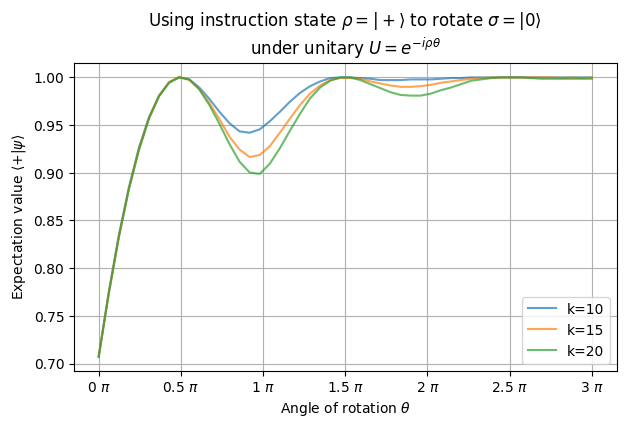

: 

In [13]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize=(7,4))
thetas = np.linspace(0,3*np.pi,50)
thetas = thetas/np.pi
ax.plot(thetas,res_10,label='k=10',alpha=0.7)
plt.plot(thetas,res_15,label='k=15',alpha=0.7)
plt.plot(thetas,res_20,label='k=20',alpha=0.7)
plt.grid()
plt.xlabel(r'Angle of rotation $\theta$')
plt.ylabel(r'Expectation value $\langle{+|\psi}\rangle$')
plt.title(r'Using instruction state $\rho = |+\rangle$ to rotate $\sigma =|0\rangle$'+'\n'+r'under unitary $U = e^{-i\rho\theta}$')
plt.legend()
import matplotlib.ticker as tck
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

